In [103]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks")

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams


sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 2.5})

In [114]:
len(data.GarageFinish[data.GarageFinish.isnull()])

81

In [104]:
data = pd.read_csv('train.csv')
data_new = data.copy()

data_new.drop(['YrSold', 'YearBuilt',  ], axis =1)

columns_noncont = ["MSZoning", "Neighborhood", "Condition1",
                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond", "SalePrice"]

cont_features = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "YearRemodAdd", "GarageYrBlt", "MasVnrArea", 
                 "LotArea", "BsmtFinSF1", "WoodDeckSF", "OpenPorchSF", "2ndFlrSF", "BsmtUnfSF", "ScreenPorch", 
                 "PoolArea", "3SsnPorch", "BsmtFinSF2", "MiscVal", "LowQualFinSF", "EnclosedPorch", "Age", "LotFrontage"]            
#columns_all = columns_noncont + list(X_all_cont.columns[0:-1]) + ['SalePrice']

data_all = data_new[columns_noncont]

#data_all = data_all.dropna().reset_index(drop=True)
print np.shape(data_all)

(1460, 23)


In [105]:
#data_all['LotFrontage'] = data_all.LotFrontage.fillna(0.)
#set(data_all.LotFrontage)

In [107]:
data_NAN=data_all[pd.isnull(data_all).any(axis=1)]
for col in data_NAN.columns:
    tmp = data_NAN[col][pd.isnull(data_NAN[col])]
    if len(tmp) > 1:
        if data_NAN[col].dtypes == object:
            data_all[col] = data_all[col].fillna('nothing')


/Users/gmsardane/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
set(data_all.GarageCond)

{'Ex', 'Fa', 'Gd', 'Po', 'TA', 'nothing'}

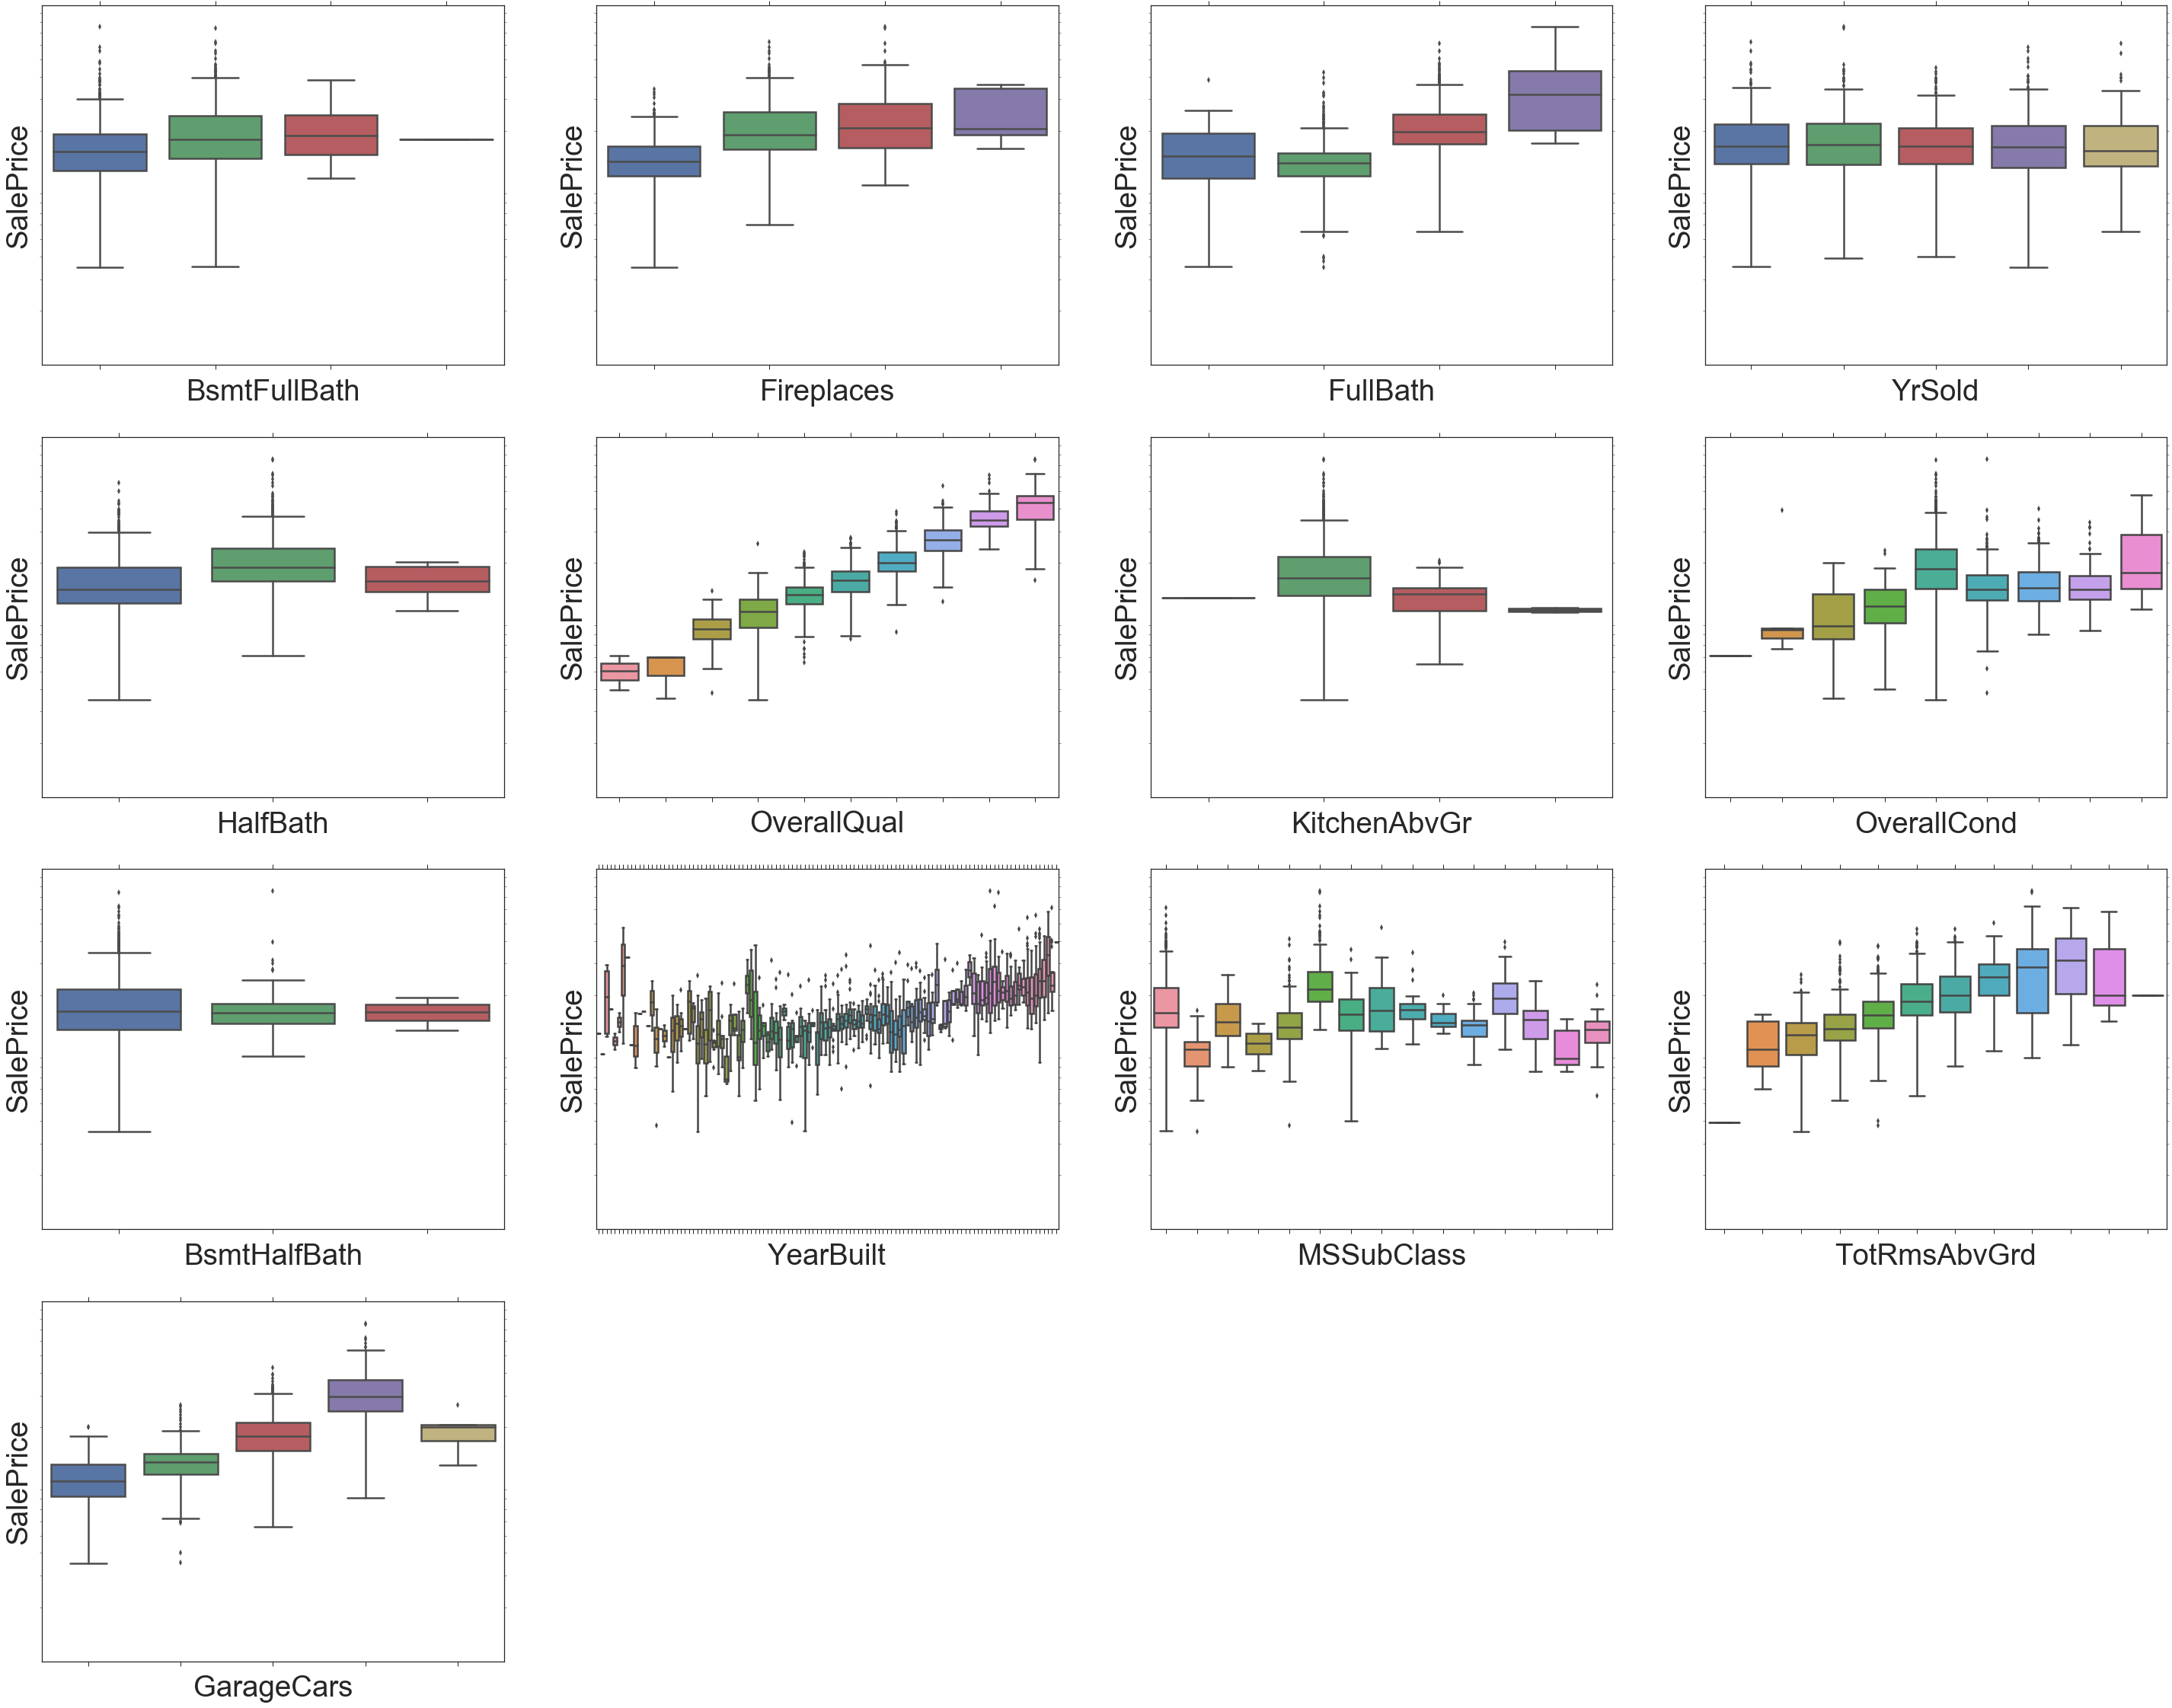

In [3]:

# Discrete features.
discrete_features = list(set(list(data.columns[data.dtypes == 'int64'][1:-1])) - set(cont_features))
plt.figure(figsize=(50, 100))

for i, feature in enumerate(discrete_features[1:-1],1):
    if feature not in cont_features:
        plt.subplot(10, 4, i)
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        g.set(xticklabels=[])
        plt.xticks( rotation=45)
        plt.semilogy()
        plt.yticks(())

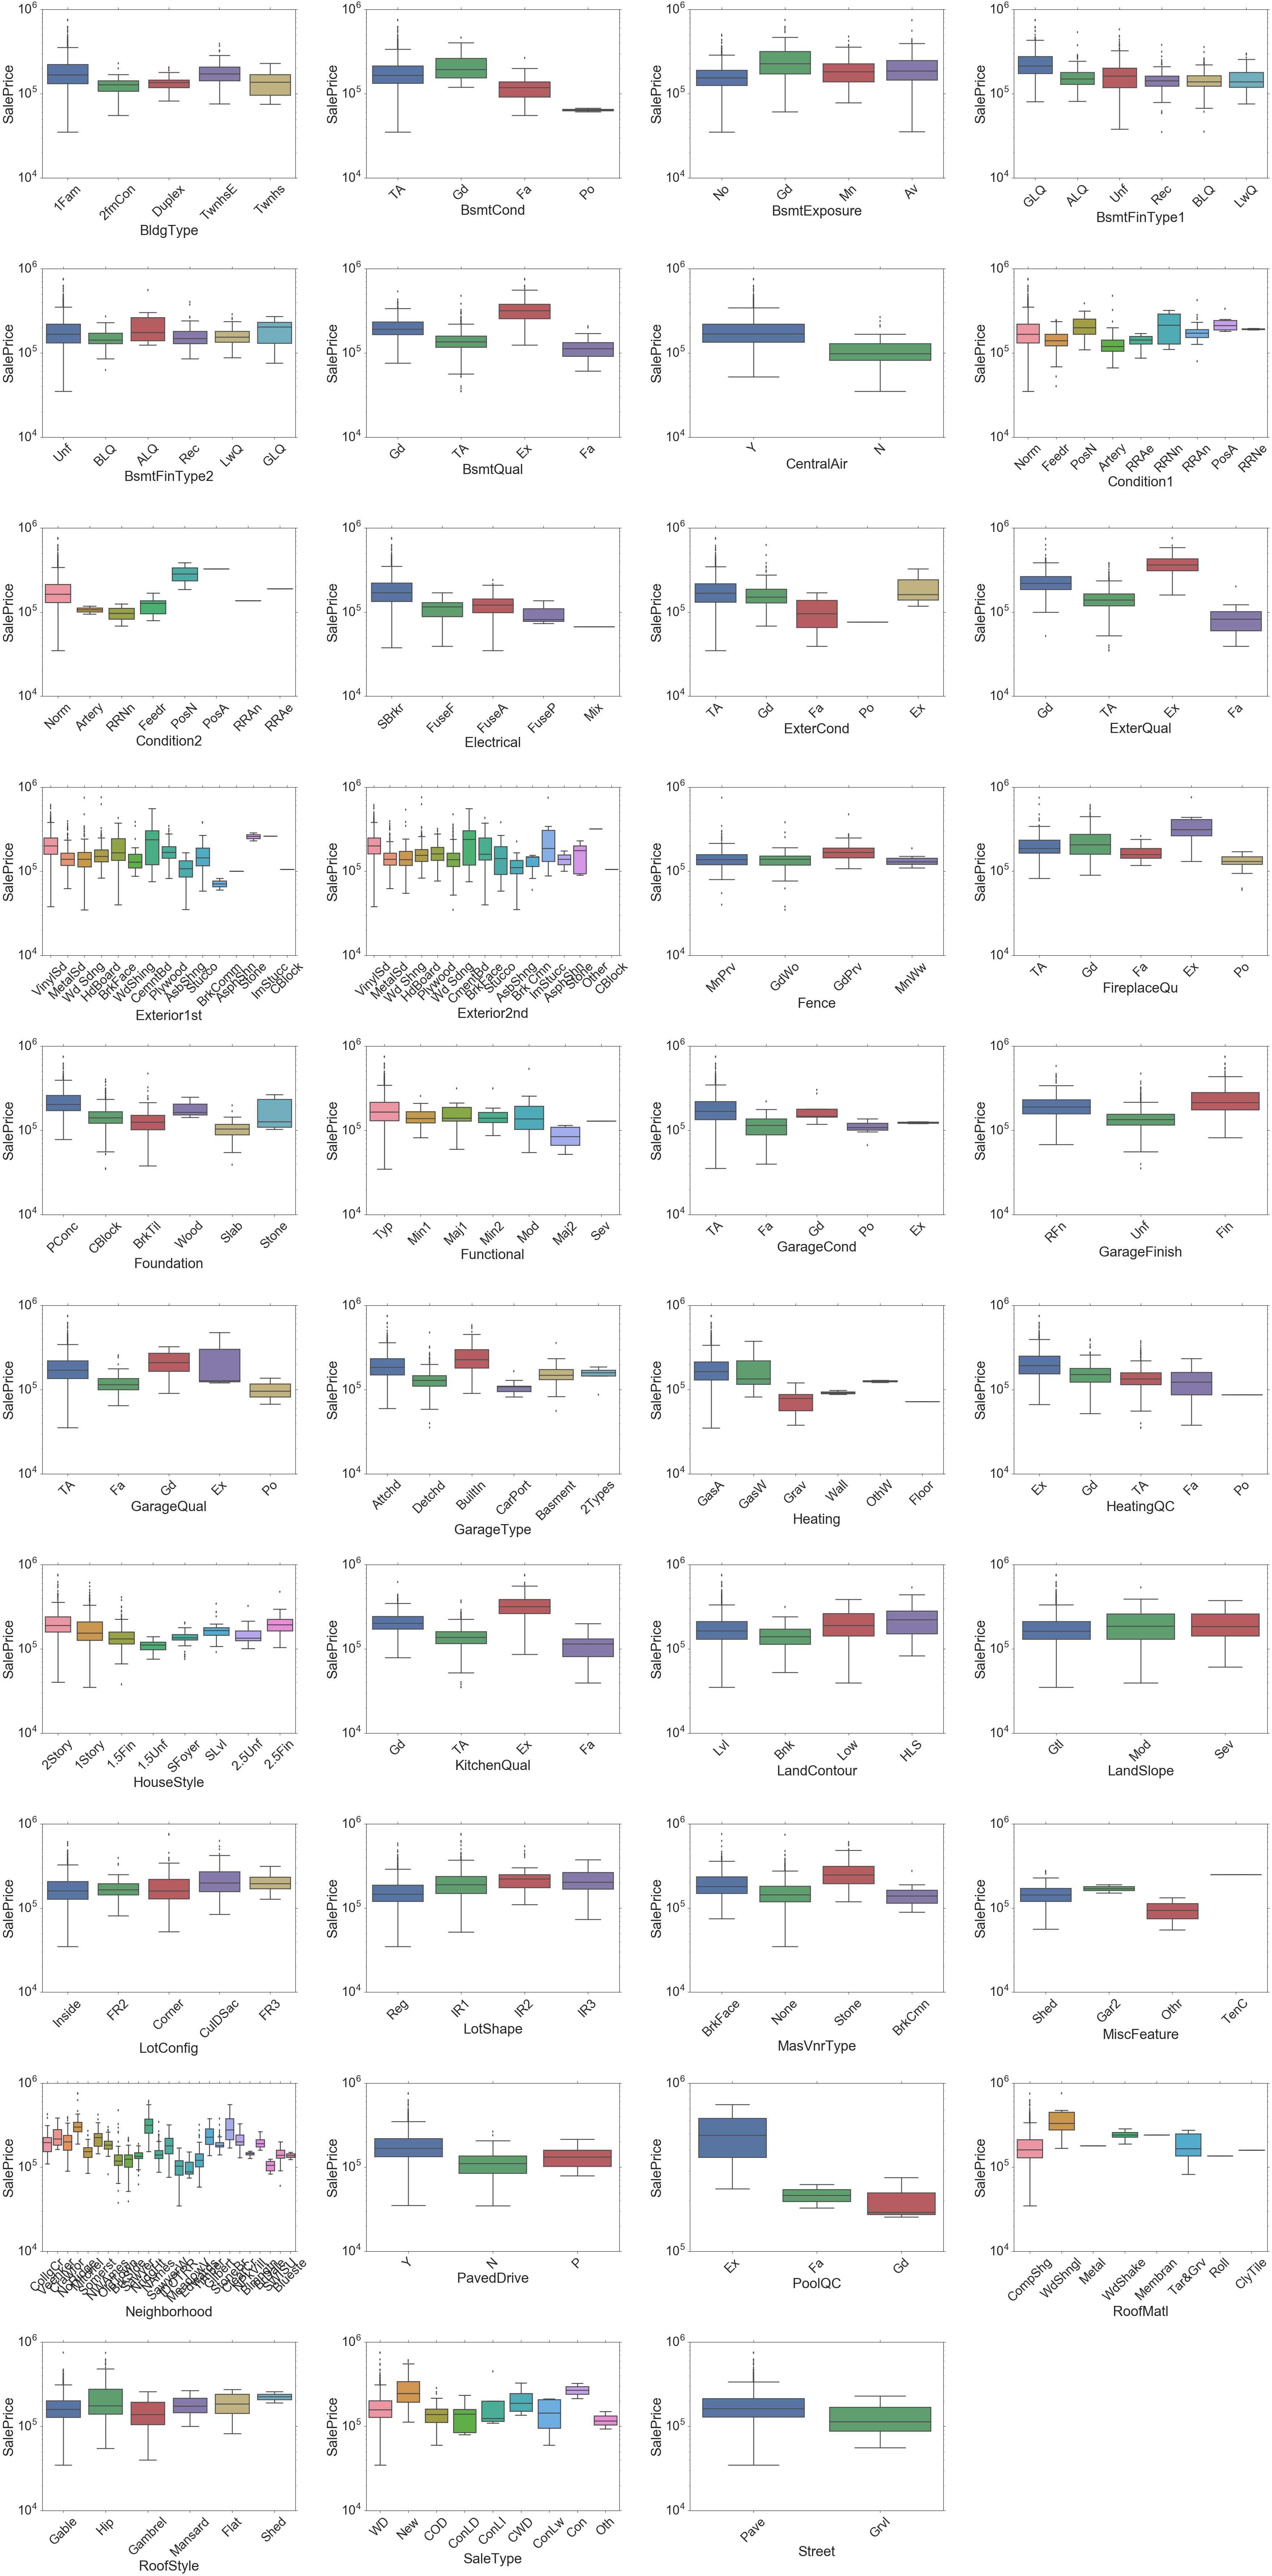

In [4]:
category_features = sorted(list(set(list(data.columns[data.dtypes == object][1:-1])) - set(cont_features)))
plt.figure(figsize=(50, 100))

for i, feature in enumerate(category_features[1:-1],1):
    if feature not in cont_features:
        plt.subplot(10, 4, i)
        # Determine the order of boxes
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        plt.xticks( rotation=45)
        plt.yticks(())
        plt.semilogy()
plt.tight_layout()
#columns_noncont = ["MSZoning","LotFrontage", "Neighborhood", "Condition1",
#                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
#                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
#                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond"]
#

In [5]:
def pairsplot(df, features):
    g = sns.pairplot(df, x_vars=features, y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg");
    return g

In [6]:
cat_columns = sorted(data.select_dtypes(['object']).columns)

for column in cat_columns:
    data[column] = data[column].astype('category')

#print data.dtypes[data.dtypes == 'category']
#print cat_columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

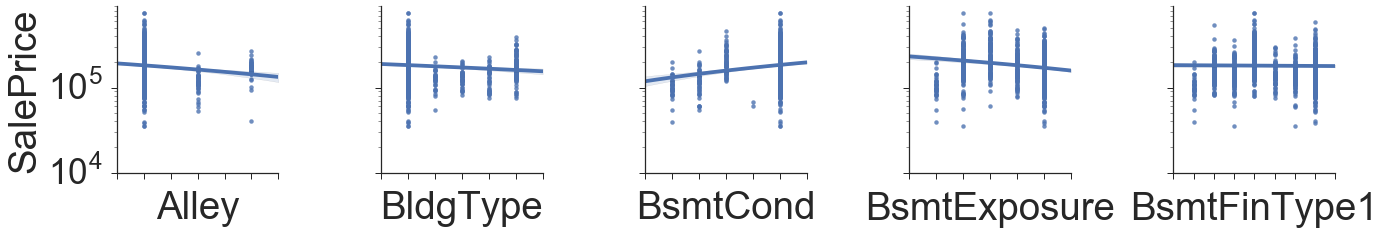

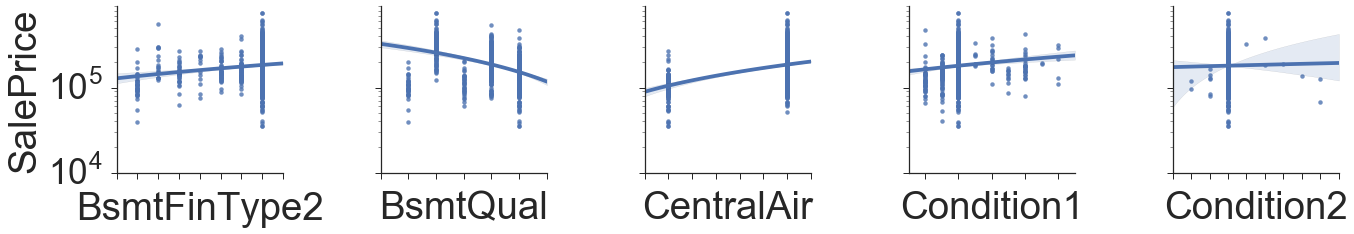

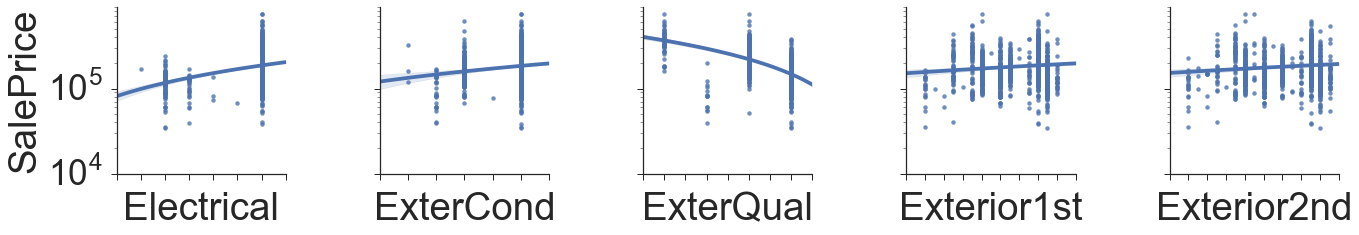

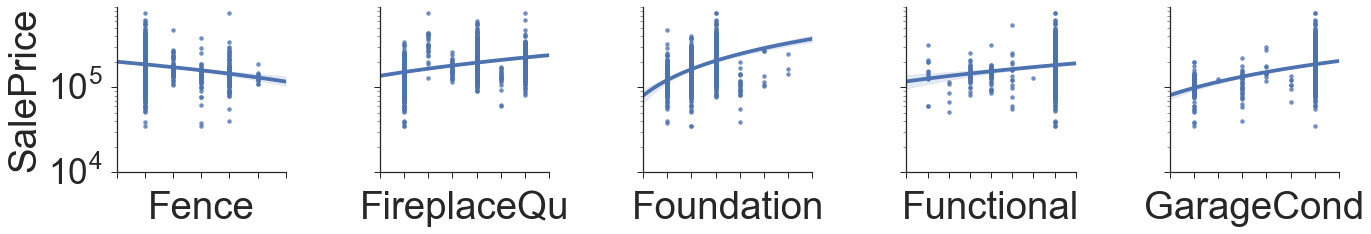

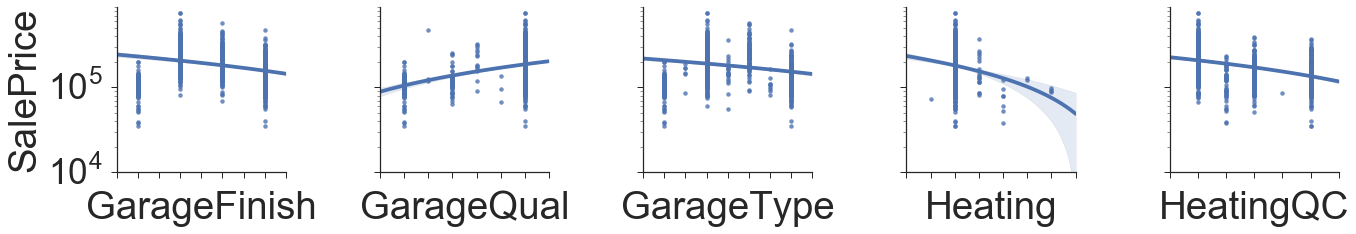

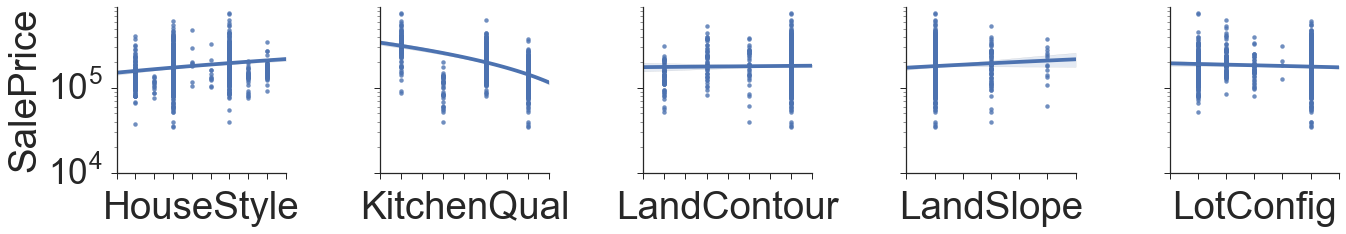

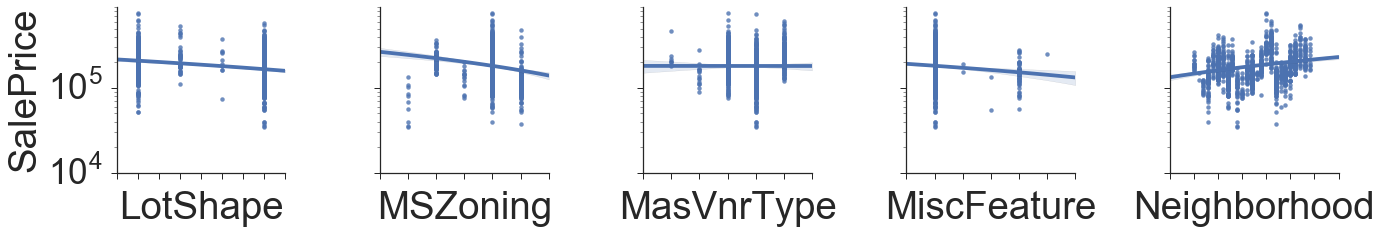

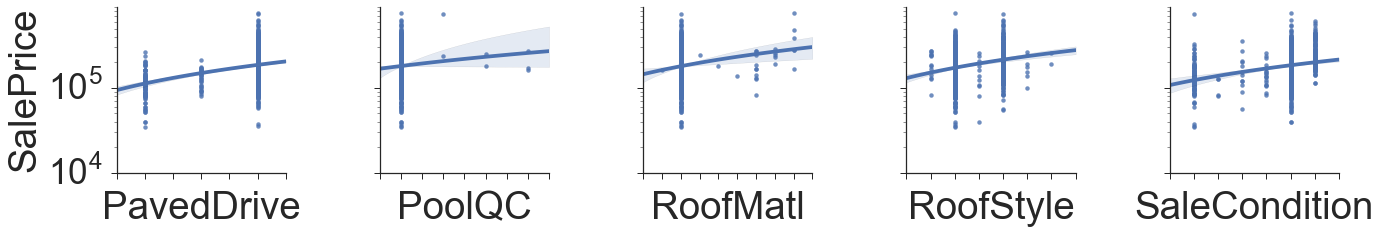

In [9]:
for j in range(0, len(cat_columns)-5, 5):
    g = pairsplot(data, cat_columns[j:j+5])
    plt.ylim(1e4,)
    g.set(xticklabels=[])
    plt.semilogy()

#pairsplot(data_continuous, data_continuous.columns[14:19])

columns_noncont = ["MSZoning", "Neighborhood", "Condition1",
                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation", "HeatingQC", "HouseStyle",
                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond"]
